## Javad Ranjbar Kermani
## SVM (support vector method)

In [60]:
# import libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
data = pd.read_csv('micro_test_data.txt',names=['Feature1', 'Feature2', 'Confirmed'])
data.head()

,Feature1,Feature2,Confirmed
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [62]:
# function for feature mapping and creating new features from pervious features
def Feature_mapping(data, features, degree):
    """
        This function reuturns df (new dataset after feature mapping)
        data : data in dataset
        features : number of features
        degree = degree of feature mapping
    """
    df = copy.deepcopy(data)
    degree = degree
    df.insert(0, 'Ones', 1) # Insert a first column with ones.
    x = []
    for n in range(1, features + 1):
        x.append(df.iloc[:, n])
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            df['x' + str(i) + str(j)] = np.power(x[0], i-j) * np.power(x[1], j)
    cols = [0, 1, 2] # unnecessary and repetitious columns
    df.drop(df.columns[cols], axis=1, inplace=True)
    cols = df.columns.tolist()
    cols = cols[1:] + [cols[0]]
    df = df[cols]
    return df

In [63]:
df = Feature_mapping(data, features=2, degree=2)
x1 = df.iloc[:, 0:-1]
y1 = df.iloc[:, -1]

In [64]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

## logistic model

In [65]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(C=0.1)
logistic_model.fit(x1_train, y1_train)

LogisticRegression(C=0.1)

In [66]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
y_pred_logistic_model = logistic_model.predict(x1_test)
print('precision score =', precision_score(y1_test, y_pred_logistic_model), '\n')
print('accuracy score =', accuracy_score(y1_test, y_pred_logistic_model), '\n')
print('f1 score =', f1_score(y1_test, y_pred_logistic_model), '\n')
print('recall score =', recall_score(y1_test, y_pred_logistic_model), '\n')

precision score = 0.5454545454545454 

accuracy score = 0.5416666666666666 

f1 score = 0.5217391304347826 

recall score = 0.5 



In [67]:
x2 = data.iloc[:, 0:-1]
y2 = data.iloc[:, -1]

In [68]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

## SVM Method

### Poly  kernel

In [69]:
from sklearn.svm import SVC
poly2_model = SVC(kernel='poly', degree = 2) #poly degree2
poly4_model = SVC(kernel='poly', degree = 4) #poly degree4
poly2_model.fit(x2_train,y2_train)
poly4_model.fit(x2_train,y2_train)

SVC(degree=4, kernel='poly')

In [70]:
y_pred_poly2_model = poly2_model.predict(x2_test)
y_pred_poly4_model = poly4_model.predict(x2_test)
print('poly kernel degree2 :', '\n')
print('precision score poly4 =', precision_score(y2_test, y_pred_poly2_model))
print('accuracy score poly4 =', accuracy_score(y2_test, y_pred_poly2_model))
print('f1 score poly4 =', f1_score(y2_test, y_pred_poly2_model))
print('recall score poly4=',recall_score(y2_test, y_pred_poly2_model), '\n')
print('poly kernel degree4 :', '\n')
print('precision score poly4 =', precision_score(y2_test, y_pred_poly4_model))
print('accuracy score poly4 =', accuracy_score(y2_test, y_pred_poly4_model))
print('f1 score poly4 =', f1_score(y2_test, y_pred_poly4_model))
print('recall score poly4=',recall_score(y2_test, y_pred_poly4_model), '\n')

poly kernel degree2 : 

precision score poly4 = 1.0
accuracy score poly4 = 0.9583333333333334
f1 score poly4 = 0.9565217391304348
recall score poly4= 0.9166666666666666 

poly kernel degree4 : 

precision score poly4 = 0.8
accuracy score poly4 = 0.875
f1 score poly4 = 0.888888888888889
recall score poly4= 1.0 



### rbf kernel

In [71]:
rbf_model = SVC(kernel='rbf', gamma ='scale')
rbf_model.fit(x2_train, y2_train)

SVC()

In [72]:
y_pred_rbf_model= rbf_model.predict(x2_test)
print('precision score =', precision_score(y2_test, y_pred_rbf_model), '\n')
print('accuracy score =', accuracy_score(y2_test, y_pred_rbf_model), '\n')
print('f1 score =', f1_score(y2_test, y_pred_rbf_model), '\n')
print('recall score =', recall_score(y2_test, y_pred_rbf_model), '\n')

precision score = 0.9 

accuracy score = 0.8333333333333334 

f1 score = 0.8181818181818182 

recall score = 0.75 



### Plot ROC and compare AUC

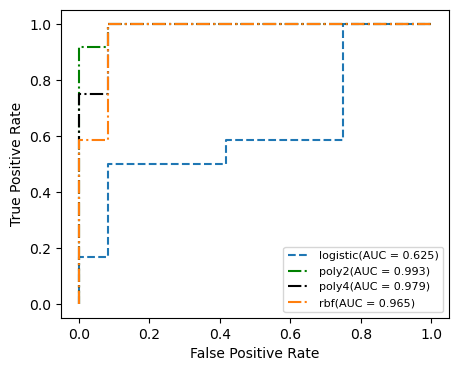

In [74]:
from sklearn.metrics import roc_curve, auc

y_pred_logistic = logistic_model .decision_function(x1_test)
y_pred_poly2 = poly2_model.decision_function(x2_test)
y_pred_poly4 = poly4_model.decision_function(x2_test)
y_pred_rbf = rbf_model.decision_function(x2_test)  

logistic_fpr, logistic_tpr, threshold = roc_curve(y1_test, y_pred_logistic)
logistic_auc = auc(logistic_fpr, logistic_tpr)

poly2_fpr, poly2_tpr, threshold = roc_curve(y2_test, y_pred_poly2)
poly2_auc = auc(poly2_fpr, poly2_tpr)

poly4_fpr, poly4_tpr, threshold = roc_curve(y2_test, y_pred_poly4)
poly4_auc = auc(poly4_fpr, poly4_tpr)

rbf_fpr, rbf_tpr, threshold = roc_curve(y2_test, y_pred_rbf)
rbf_auc = auc(rbf_fpr, rbf_tpr)

plt.figure(figsize = (5,4))
plt.plot(logistic_fpr, logistic_tpr , linestyle = '--', label='logistic(AUC = %0.3f)' % logistic_auc)
plt.plot(poly2_fpr, poly2_tpr,color = 'green', linestyle = '-.', label='poly2(AUC = %0.3f)' % poly2_auc)
plt.plot(poly4_fpr, poly4_tpr,color = 'black', linestyle = '-.', label='poly4(AUC = %0.3f)' % poly4_auc)
plt.plot(rbf_fpr, rbf_tpr, linestyle = '-.', label='rbf(AUC = %0.3f)' % rbf_auc)



plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, prop={'size': 8})
plt.show()
